<h3>Define a function to change the font color of <code>print()</code> function.</h3>

In [2]:
def c(color):
    
    color_dict = {
        "PURPLE": "\033[95m",
        "CYAN": "\033[96m",
        "DARKCYAN": "\033[36m",
        "BLUE": "\033[94m",
        "GREEN": "\033[92m",
        "YELLOW": "\033[93m",
        "RED": "\033[91m",
        "BOLD": "\033[1m",
        "UNDERLINE": "\033[4m",
        "END": "\033[0m"}
    
    for k, v in color_dict.items():
        k = k.lower()[0:1]
        if k == color :
            return v  

print(c("y")+"hello")


hello


In [81]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.linear_model import LinearRegression


df = pd.read_csv("autos_data.csv")

df.info()
#len(df.columns)


    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         159 non-null    int64  
 1   symboling          159 non-null    int64  
 2   normalized-losses  159 non-null    int64  
 3   make               159 non-null    object 
 4   fuel-type          159 non-null    object 
 5   aspiration         159 non-null    object 
 6   num-of-doors       159 non-null    object 
 7   body-style         159 non-null    object 
 8   drive-wheels       159 non-null    object 
 9   engine-location    159 non-null    object 
 10  wheel-base         159 non-null    float64
 11  length             159 non-null    float64
 12  width              159 non-null    float64
 13  height             159 non-null    float64
 14  curb-weight        159 non-null    int64  
 15  engine-type        159 non-null    object 
 16  num-of-cylinders   159 non

<font size="3">Lets define some functions for plottting

In [35]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6.5
    plt.figure(figsize=(width, height))

    ax1 = sns.histplot(RedFunction, kde=True, stat="density", color="r", label=RedName)
    sns.histplot(BlueFunction, kde=True, stat="density", color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()
    

In [67]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 8
    height = 6.5
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'bo', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
 
    plt.ylabel('Price')
    plt.legend()
    plt.show()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into <em>training</em> and <em>testing</em> data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [7]:
y_data = df['price']

Drop the **price** from the `df`

In [8]:
x_data = df.drop("price", axis=1)

Now we randomly split our data into <em>training</em> and <em>testing</em> using the funtion <b>train_test_split</b>.

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
print(c("r")+"number of test samples :", x_test.shape[0])
print(c("b")+"number of training samples:",x_train.shape[0])

number of test samples : 16
number of training samples: 143


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


First we create linear regression object **lr**

In [10]:
lr = LinearRegression()

we fit the model using the feature **horsepower**

In [11]:
lr.fit(x_train[["horsepower"]], y_train)

LinearRegression()

Lets calcualte the $R^2$ on the test data and train test data, respectively.

In [12]:
r_squared_test = lr.score(x_test[["horsepower"]], y_test)
r_squared_train = lr.score(x_train[["horsepower"]], y_train)
print(c("b") +"R squared on the test data:", r_squared_test, c("r") +"\nR squared on the train data:", r_squared_train)

R squared on the test data: 0.6105356971242022 
R squared on the train data: 0.5735367271142604


We can see that $R^2$ is much smaller using test data compared to the train data.

<h2>Cross-Validation Score</h2> <br> <hr>
Let's import the module  <b><a href="https://scikit-learn.org/stable/modules/cross_validation.html">cross_val_score</b></a>  from the <b>model_selection</b>.

In [13]:
from sklearn.model_selection import cross_val_score

We input the object, the feature (*horsepower*), and the target data (y_data). The paramater `cv` determienes the number of 
folds, in this case, it is 4.

In [14]:
rcross = cross_val_score(lr, x_data[["horsepower"]], y_data, cv =4)
rcross

array([0.71333688, 0.43747571, 0.72548362, 0.299635  ])

The default scoring is $R^2$. Each element in the array has the average $R^2$ value  for the fold.

We can calculate the average and standard deviation of our estimate:

In [15]:
print(c("r") + "The mean of the folds are:", rcross.mean(), c("b") + "\nAnd the standard deviation of the folds:", rcross.std())

The mean of the folds are: 0.5439828036377024 
And the standard deviation of the folds: 0.18212149565712693


<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Lets create Multiple Linear Regression and train the model using **'horsepower',
'curb-weight', 'engine-size' and 'highway-mpg'** as features.

In [19]:
mlr = LinearRegression()
mlr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = mlr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:3]

array([ 6270.81591886, 10372.32626239, 12894.44956787])

Lets do a prediction using the **test data**

In [37]:
yhat_test = mlr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[:3]

array([10242.60694805, 11082.46411922,  5956.28205186])

Lets examine the distribution of the predicted values of the training data using visualization

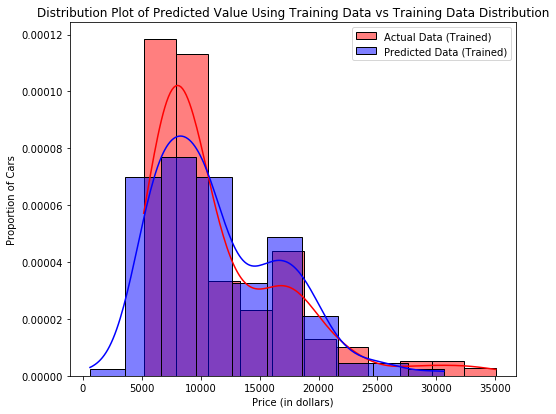

In [40]:
title = "Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Data (Trained)", "Predicted Data (Trained)", title)

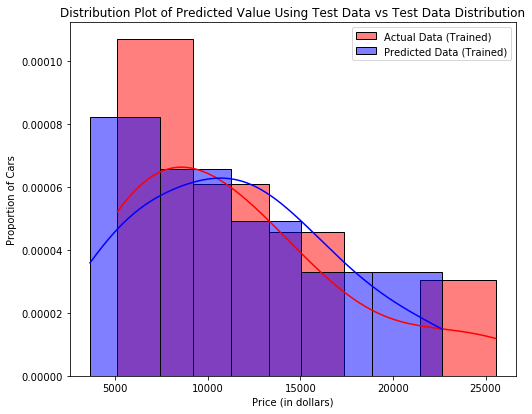

In [46]:
title = "Distribution Plot of Predicted Value Using Test Data vs Test Data Distribution"
DistributionPlot(y_test, yhat_test, "Actual Data (Trained)", "Predicted Data (Trained)", title)

This difference in Figure 2 is apparent
in the range of 5000 to 15,000. This is where the shape of the distribution is extremely
different. <br>
Lets see if polynomial regression also exhibits a drop in the prediction
accuracy when analysing the test dataset.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not 
the underlying process. Therefore, when testing your model 
using the test set, your model does not perform as well since it is 
modelling noise, not the underlying process that generated the relationship. 
Let's create a degree 5 <b>polynomial</b> model.</p>


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

pr = PolynomialFeatures(degree=5)
x_train_pr =  pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])


Now, let's create a Linear Regression model "poly" and train it.

In [56]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
# output
yhat = poly.predict(x_test_pr)
print(c("r")+"Predicted:", yhat[:4], c("b")+"\nActual values:", y_test[0:4].values)

Predicted: [16609.47143892  9162.7238826  21392.63877162 16943.0618058 ] 
Actual values: [21105 10595 18150 28248]


Now lets plot the test and training data using `PollyPlot()`

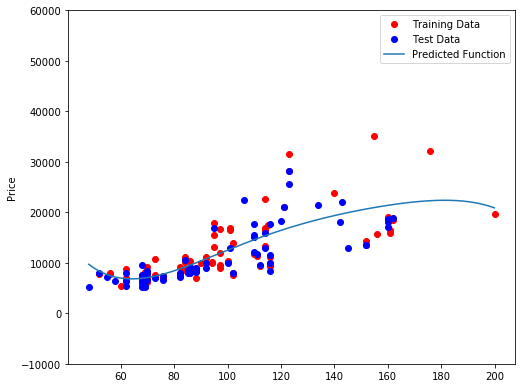

In [68]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

We can see that the estimated function appears to track the data points up to 200 horsepower,then begins to diverge.
Lets check the $R^2$ of the test and trained data.

In [77]:
r2_train = poly.score(x_train_pr, y_train)
r2_test = poly.score(x_test_pr, y_test)
print(c("y")+"R squred for the trained data:",r2_train, c("b") + "\nR squared for the test:", r2_test )


R squred for the trained data: 0.5919027582343354 
R squared for the test: 0.6131997414952315


Lets see how the $R^2$ changes the test data for different polynomial orders

Text(0.5, 1.0, 'R^2 Using Test Data')

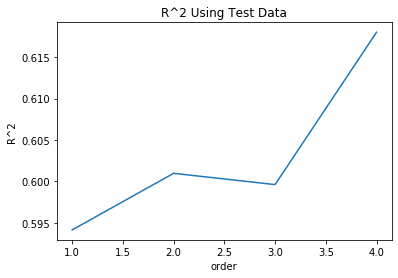

In [80]:
R2_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    R2_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
#plt.text(3, 0.75, 'Maximum R^2 ')  

Define a function `f()` that will bel used below

In [84]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amount of data.

In [85]:
interact(f, order=(0,6,1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

**interact (f, arg*)** -- at the most basic level, interact autogenerates `UI` controls 
for function arguments, and then calls 
the function with those arguments when you manipulate the controls interactively. 

<h2 id="ref3">Part 3: Ridge Regression</h2> 

In this section, we will review **Ridge Regression** and see how the parameter `alpha` changes the model. 
Here our test data will be used as validation data.<br> 
Lets perform a polynomial transformation with a 2-degree on our data.

In [95]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Lets import `Ridge` from the module linear models

In [91]:
from sklearn.linear_model import Ridge

Lets create a Ridge regression object, setting the regularization paramater `alpha=0.1`

In [97]:
ridge_model = Ridge(alpha=0.1)
# just like regular regression, we can fit the data using ridge_model
ridge_model.fit(x_train_pr, y_train)
# lets get the predictions
yhat = ridge_model.predict(x_test_pr)
print(c("r")+"Predicted:", yhat[:4], c("b")+"\nActual values:", y_test[0:4].values)

Predicted: [17884.78626274  9963.37781281 27707.50523868 30364.38005791] 
Actual values: [21105 10595 18150 28248]


We select the value of alpha that minimize the test error. To do so, we can use a loop and 
create a `progress bar` to see how many iterations we have completed so far.

100%|████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.79it/s, Test Score=0.835, Train Score=0.911]


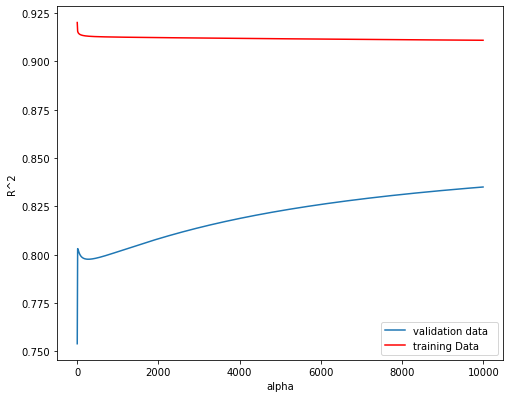

In [110]:
from tqdm import tqdm

R2_test = []
R2_train = []
dummy1 = []
Alpha = 10*np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train_pr, y_train)
    test_score, train_score = ridge_model.score(x_test_pr, y_test), ridge_model.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    R2_test.append(test_score)
    R2_train.append(train_score)

plt.figure(figsize=(8,6.5))
plt.plot(Alpha,R2_test, label='validation data  ')
plt.plot(Alpha,R2_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

<h2 id="ref4">Part 4: Grid Search</h2>
    
The term alpha is a hyperparameter. `Sklearn` has the class `GridSearchCV` to make the process of 
finding the best *hyperparameter* simpler.

In [111]:
from sklearn.model_selection import GridSearchCV

We can create a dictionary of parameter values

In [119]:
pars_grid = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

#create again ridge regression object
ridge_1 = Ridge()


Create a ridge grid research object:

In [120]:
grid_1 = GridSearchCV(ridge_1, pars_grid, cv = 4)

grid_1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data, we can obtain the `estimator` with 
the best parameters and asssign it ot the variabel `BestRR`.

In [125]:
BestRR = grid_1.best_estimator_

# Now we test our model on the test data again

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)
 

0.8244770182483041